In [58]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
import json
import csv

In [4]:
url = 'https://www.worldometers.info/coronavirus/country/india/'

In [5]:
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')


<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!--> <html lang="en"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>India COVID: 30,276,685 Cases and 396,636 Deaths - Worldometer</title>
<meta content="India Coronavirus update with statistics and graphs: total and new cases, deaths per day, mortality and recovery rates, current active cases, recoveries, trends and timeline." name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x76.png" rel=
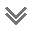

In [6]:
soup

In [8]:
scripts = soup.find_all('script')
script = scripts[22].text
script

'\n    Highcharts.chart(\'coronavirus-cases-linear\', {\n        chart: {\n            type: \'line\'\n        },\n        title: {\n            text: \'Total Cases\'\n        },\n\n        subtitle: {\n            text: \'(Linear Scale)\'\n        },\n\n        xAxis: {\n            categories: ["Feb 15, 2020","Feb 16, 2020","Feb 17, 2020","Feb 18, 2020","Feb 19, 2020","Feb 20, 2020","Feb 21, 2020","Feb 22, 2020","Feb 23, 2020","Feb 24, 2020","Feb 25, 2020","Feb 26, 2020","Feb 27, 2020","Feb 28, 2020","Feb 29, 2020","Mar 01, 2020","Mar 02, 2020","Mar 03, 2020","Mar 04, 2020","Mar 05, 2020","Mar 06, 2020","Mar 07, 2020","Mar 08, 2020","Mar 09, 2020","Mar 10, 2020","Mar 11, 2020","Mar 12, 2020","Mar 13, 2020","Mar 14, 2020","Mar 15, 2020","Mar 16, 2020","Mar 17, 2020","Mar 18, 2020","Mar 19, 2020","Mar 20, 2020","Mar 21, 2020","Mar 22, 2020","Mar 23, 2020","Mar 24, 2020","Mar 25, 2020","Mar 26, 2020","Mar 27, 2020","Mar 28, 2020","Mar 29, 2020","Mar 30, 2020","Mar 31, 2020","Apr 01, 202

In [87]:
dates = script.split("categories: [",1)[1].split("]")[0]
dates = "["+dates+"]"
dates = json.loads(dates)
dates[:5]

['Feb 15, 2020',
 'Feb 16, 2020',
 'Feb 17, 2020',
 'Feb 18, 2020',
 'Feb 19, 2020']

In [88]:
data = script.split("data: [",1)[1].split("]")[0]
data = "["+data+"]"
data = json.loads(data)
data[:5]

[3, 3, 3, 3, 3]

In [61]:
type(data)

numpy.ndarray

In [38]:
df.shape

(498, 2)

In [89]:
# Take only some part of data by giving gap in between
DATES = np.array(dates[::17])
DATA = np.array(data[::17])

In [90]:
covidCombined = pd.DataFrame({'time': DATES,'cases': DATA})

In [91]:
covidCombined.head()

,time,cases
0,"Feb 15, 2020",3
1,"Mar 03, 2020",7
2,"Mar 20, 2020",249
3,"Apr 06, 2020",4778
4,"Apr 23, 2020",23039


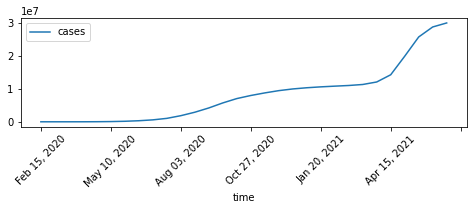

In [92]:
import matplotlib.pyplot as plt
#df.plot.bar(x='Time' , y='Total Cases' , figsize=(16,4))
covidCombined.plot.line(x='time' , y='cases' ,figsize=(8,2))
plt.xticks(rotation = 45)
plt.show()

Create CSV file

In [93]:
df = pd.DataFrame({"Time" : dates , "Total Cases": data} )
df.head()

,Time,Total Cases
0,"Feb 15, 2020",3
1,"Feb 16, 2020",3
2,"Feb 17, 2020",3
3,"Feb 18, 2020",3
4,"Feb 19, 2020",3


In [94]:
df.shape

(498, 2)

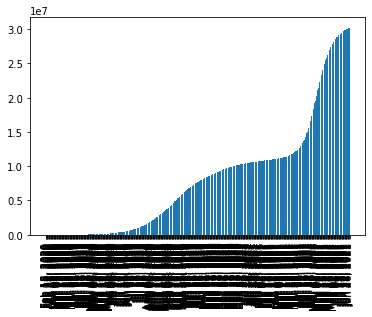

In [106]:
plt.bar(x='Time' ,height='Total Cases', data=df , )
plt.xticks(rotation = 90)
plt.show()